In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, plot_confusion_matrix
# from sklearn.

In [3]:
train = pd.read_csv('train_final.csv')
test = pd.read_csv('test_final.csv')

Анализ данных

In [4]:
train.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,Resort Hotel,0,3,2016,February,7,12,0,2,2,...,E,F,0,No Deposit,0,Transient,81.0,1,0,2016-02-14
1,City Hotel,1,50,2016,November,47,18,1,2,2,...,A,A,0,No Deposit,0,Transient,93.6,0,2,2016-10-09
2,City Hotel,0,14,2015,September,37,7,1,5,2,...,F,F,0,No Deposit,0,Contract,166.0,0,3,2015-09-13
3,City Hotel,0,18,2015,December,50,6,2,0,2,...,A,A,0,No Deposit,0,Transient,107.0,0,0,2015-12-08
4,City Hotel,1,263,2016,September,40,29,2,4,2,...,A,A,0,No Deposit,0,Transient,100.3,0,0,2016-01-18


In [5]:
test.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,City Hotel,73,2016,July,28,6,0,2,1,0.0,...,A,A,0,No Deposit,0,Transient,107.10,0,0,2016-06-12
1,City Hotel,37,2015,October,43,24,2,5,1,1.0,...,A,A,0,No Deposit,0,Transient,87.78,0,0,2015-10-31
2,City Hotel,190,2017,April,14,6,2,3,2,0.0,...,A,A,0,No Deposit,0,Transient,88.40,0,0,2016-09-29
3,City Hotel,287,2016,August,35,24,1,4,2,0.0,...,B,B,1,No Deposit,0,Transient,76.71,0,0,2016-08-29
4,Resort Hotel,386,2016,October,43,20,1,3,2,0.0,...,A,A,0,No Deposit,0,Transient-Party,49.00,0,0,2016-09-14


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44638 entries, 0 to 44637
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           44638 non-null  object 
 1   is_canceled                     44638 non-null  int64  
 2   lead_time                       44638 non-null  int64  
 3   arrival_date_year               44638 non-null  int64  
 4   arrival_date_month              44638 non-null  object 
 5   arrival_date_week_number        44638 non-null  int64  
 6   arrival_date_day_of_month       44638 non-null  int64  
 7   stays_in_weekend_nights         44638 non-null  int64  
 8   stays_in_week_nights            44638 non-null  int64  
 9   adults                          44638 non-null  int64  
 10  children                        44638 non-null  float64
 11  babies                          44638 non-null  int64  
 12  meal                            

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23525 entries, 0 to 23524
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           23525 non-null  object 
 1   lead_time                       23525 non-null  int64  
 2   arrival_date_year               23525 non-null  int64  
 3   arrival_date_month              23525 non-null  object 
 4   arrival_date_week_number        23525 non-null  int64  
 5   arrival_date_day_of_month       23525 non-null  int64  
 6   stays_in_weekend_nights         23525 non-null  int64  
 7   stays_in_week_nights            23525 non-null  int64  
 8   adults                          23525 non-null  int64  
 9   children                        23525 non-null  float64
 10  babies                          23525 non-null  int64  
 11  meal                            23525 non-null  object 
 12  country                         

In [8]:
print(train.shape, test.shape)

(44638, 29) (23525, 28)


In [9]:
train.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [10]:
test.isna().sum()

hotel                             0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status_date     

In [11]:
train['is_canceled'].value_counts()

0    31354
1    13284
Name: is_canceled, dtype: int64

1.   В данных есть разные типы данных, нужно устранить категориальные признаки
2.   Отсутствуют пропуски
3.   Нужно восстановить колонку is_canceled
4.   Задача решается с помощью логистической регрессии
5.   Данные несбалансированные






Предобработка данных

In [17]:
# categ = train.loc[:,train.dtypes == 'object']
categ = ['hotel', 'meal', 'market_segment', 'distribution_channel']

In [13]:
train = train.drop(columns=['country', 'reserved_room_type', 'assigned_room_type', 'reservation_status_date'])
test = test.drop(columns=['country', 'reserved_room_type', 'assigned_room_type', 'reservation_status_date'])

In [18]:
for i in categ:
    label_encoder = LabelEncoder()

    label_encoder.fit(train[i])

    train[i] = label_encoder.transform(train[i])
    test[i] = label_encoder.transform(test[i])

In [ ]:
train.loc[:,train.dtypes == 'object']

In [19]:
train = pd.get_dummies(train, columns=['deposit_type', 'customer_type'])
test = pd.get_dummies(test, columns=['deposit_type', 'customer_type'])

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44638 entries, 0 to 44637
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           44638 non-null  int64  
 1   is_canceled                     44638 non-null  int64  
 2   lead_time                       44638 non-null  int64  
 3   arrival_date_year               44638 non-null  int64  
 4   arrival_date_month              44638 non-null  int64  
 5   arrival_date_week_number        44638 non-null  int64  
 6   arrival_date_day_of_month       44638 non-null  int64  
 7   stays_in_weekend_nights         44638 non-null  int64  
 8   stays_in_week_nights            44638 non-null  int64  
 9   adults                          44638 non-null  int64  
 10  children                        44638 non-null  float64
 11  babies                          44638 non-null  int64  
 12  meal                            

In [21]:
x = train.drop(columns = ['is_canceled'])
y = train['is_canceled']

In [22]:
model = LogisticRegression()
model.fit(x, y)
pred = model.predict(x)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
# accuracy_score, precision_score, recall_score
print(accuracy_score(pred, y))
print(precision_score(pred, y))
print(recall_score(pred, y))

0.7972355392266679
0.4536284251731406
0.7706867885918915


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


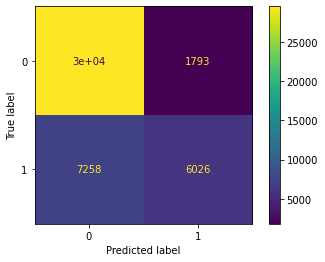

In [25]:
plot_confusion_matrix(model, x, y)
plt.show()

In [27]:
test_pred = model.predict(test)
test_pred = pd.DataFrame(test_pred, columns = ['is_canceled'])
test_pred = test_pred.reset_index()
test_pred.to_csv('solution.csv', index = False)

Какие шаги можно сделать, чтобы улучшить результат до 0,6+

1. решить, какие данные удалить, какие оставить
2. кодировать все данные одним из двух кодировшиков
3. масштабировать данные
4. сбалансировать данные
